# Lithuania 2019 election prediction

In 2019 there will be 3 elections in Lithuania (small country in Europe):

* 3 March of 2019 elections to the Municipal Councils,
* 12 May of 2019  Presidential elections,
* 26 May of 2019 elections to the European Parliament.

This notebook aims to analyze historical election data and try to predict best strategy for 2019 elections.

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Introduction

### 1. Joining EU

Let's first compared Lithuania in the context of EU member states.

In [6]:
df_EU_members = pd.read_csv("EU_member_info.csv")
df_EU_members.head()

,Country_name,Modern_country_year,Join_EU
0,Austria,1955,1995
1,Belgium,1919,1958
2,Bulgaria,1989,2007
3,Croatia,1991,2013
4,Cyprus,1960,2004


Let's add new column, which categorizes countries by the time they joined EU: (i) founders, (ii) cold war era or (iii) post soviet collapse.

In [8]:
def join_period(year):
    """
    Input:
        year: integer, year country joined EU
    Output:
        period: string, period at which country joined EU
    """
    if year == 1958:
        return "Founders"
    elif year < 1990:
        return "Cold War"
    else:
        return "Post USSR collapse"
        
df_EU_members["Join Period"] = df_EU_members['Join_EU'].apply(join_period)
df_EU_members.head()

,Country_name,Modern_country_year,Join_EU,Join Period
0,Austria,1955,1995,Post USSR collapse
1,Belgium,1919,1958,Founders
2,Bulgaria,1989,2007,Post USSR collapse
3,Croatia,1991,2013,Post USSR collapse
4,Cyprus,1960,2004,Post USSR collapse


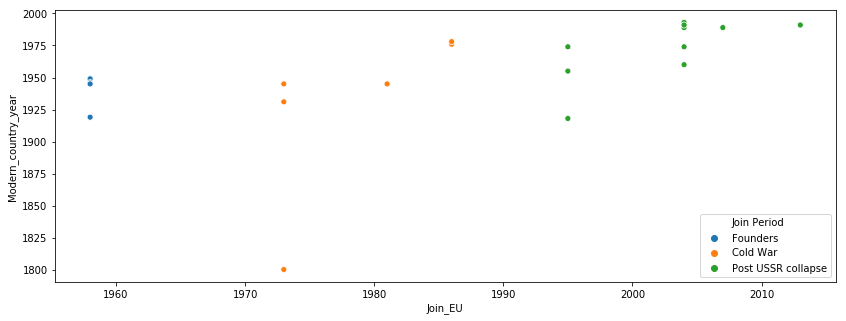

In [9]:
fig, ax = plt.subplots(figsize=(14, 5)) 
ax = sns.scatterplot(x="Join_EU", y="Modern_country_year", hue="Join Period", data=df_EU_members,
                     y_jitter=.2, hue_order=["Founders", "Cold War", "Post USSR collapse"]);

ax.legend(loc=4);

In [11]:
df_EU_members[df_EU_members.Modern_country_year <1900]

,Country_name,Modern_country_year,Join_EU,Join Period
27,United Kingdom,1800,1973,Cold War


There is an outlier with Democracy year 1800. Not suprisingly it is United Kingdom.

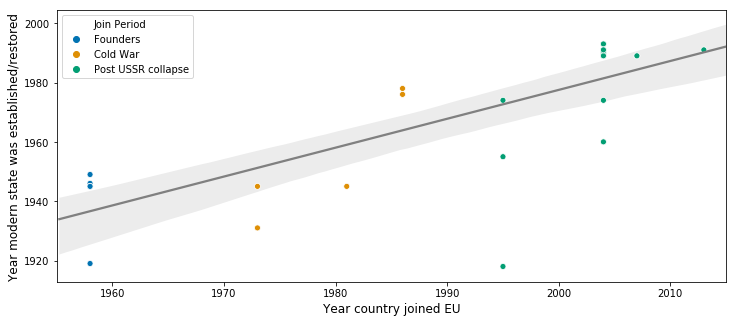

In [19]:
fig, ax = plt.subplots(figsize=(12, 5)) 

# make regplot tickers very small
ax = sns.regplot(x="Join_EU", y="Modern_country_year", scatter_kws={'s':0.2}, color='#808080',
                 data=df_EU_members[df_EU_members.Modern_country_year>1900])
ax = sns.scatterplot(x="Join_EU", y="Modern_country_year", hue="Join Period", palette="colorblind",
                     data=df_EU_members[df_EU_members.Modern_country_year>1900],
                     hue_order=["Founders", "Cold War", "Post USSR collapse"]);

ax.set_ylabel("Year modern state was established/restored", fontsize=12)
ax.set_xlabel("Year country joined EU", fontsize=12)
ax.set_xlim(1955,2015);
fig.savefig("fig_1_eu_members.svg", dpi=300, format='svg')

In [22]:
# Calculate pearson correlation coefficient
np.corrcoef(df_EU_members[df_EU_members.Modern_country_year>1900]['Modern_country_year'].values,
           df_EU_members[df_EU_members.Modern_country_year>1900]['Join_EU'].values)[0][1]

0.773563887011156

### 2. Election frequency

In [50]:
df_election_years = pd.read_csv("election_years.csv", index_col=0)
# df_election_years["Election type num"] = df_election_years["Election type"].replace({"Referendums": 4,
#                                                                                     "Parlament": 1,
#                                                                                     "Euro Parlament": 2,
#                                                                                     "Presidential": 3})
df_election_years.head()

,Year,Election type,Country
0,1992,Referendums,France
1,1993,Parlament,France
2,1994,Euro Parlament,France
3,1995,Presidential,France
4,1997,Parlament,France


In [111]:
def plot_election_dates(df):
    """
    Input:
        df- pandas DataFrame, columns [year, election type, country]
    Output:
        figure
    """
    df["Election type num"] = df["Election type"].replace({"Referendums": 4,
                                                           "Parlament": 1,
                                                           "Euro Parlament": 2,
                                                           "Presidential": 3})
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(14, 12), sharey=True) 
    # Lithuania
    _df = df[df.Country == "Lithuania"]
    ax1.scatter(_df["Year"], _df["Election type num"], s=100)
    ax1.set_yticks([1, 2, 3, 4])
    ax1.set_xticks([1990, 1995, 2000, 2005, 2010, 2015])
    ax1.set_xlim(1987.5,2017.5)
    ax1.set_yticklabels(('Parlament', 'Euro Parlament', 'Presidential', 'Referendums'))
    ax1.set_title("Lithuania")
    
    # France
    _df = df[df.Country == "France"]
    ax2.scatter(_df["Year"], _df["Election type num"], s=100)
    ax2.set_yticks([1, 2, 3, 4])
    ax2.set_xticks([1990, 1995, 2000, 2005, 2010, 2015])
    ax2.set_xlim(1987.5,2017.5)
    ax2.set_yticklabels(('Parlament', 'Euro Parlament', 'Presidential', 'Referendums'))
    ax2.set_title("France")
    
    # Finland
    _df = df[df.Country == "Finland"]
    ax3.scatter(_df["Year"], _df["Election type num"], s=100)
    ax3.set_yticks([1, 2, 3, 4])
    ax3.set_xticks([1990, 1995, 2000, 2005, 2010, 2015])
    ax3.set_xlim(1987.5,2017.5)
    ax3.set_yticklabels(('Parlament', 'Euro Parlament', 'Presidential', 'Referendums'))
    ax3.set_title("Finland")
    
    # Austria
    _df = df[df.Country == "Austria"]
    ax4.scatter(_df["Year"], _df["Election type num"], s=100)
    ax4.set_yticks([1, 2, 3, 4])
    ax4.set_xticks([1990, 1995, 2000, 2005, 2010, 2015])
    ax4.set_xlim(1987.5,2017.5)
    ax4.set_yticklabels(('Parlament', 'Euro Parlament', 'Presidential', 'Referendums'))
    ax4.set_title("Austria")    
    
    # remove vertical spacing
    fig.subplots_adjust(wspace=0)

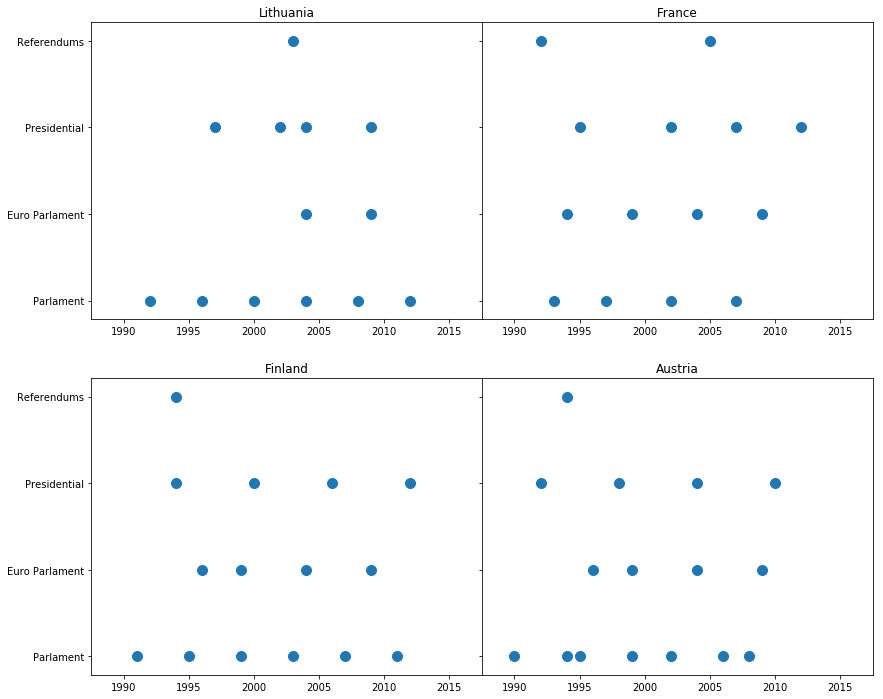

In [112]:
plot_election_dates(df_election_years)